<a href="https://colab.research.google.com/github/felippe-ribeiro/AulasIAFIAP/blob/main/Aula4_FeatureScaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Escalonamento de dados**

Afinal porque as escaladas dos dados são importantes ?


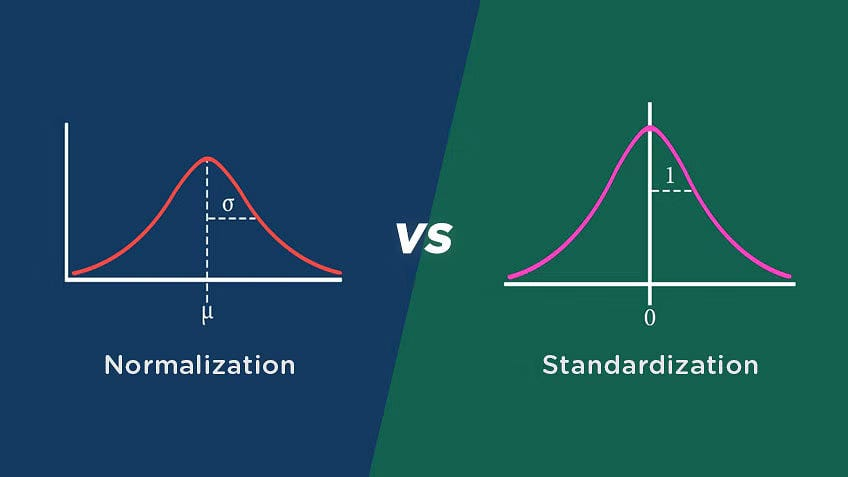

Para definirmos o que seriam as escalas dos dados, podemos dizer que as escalas referem-se à amplitude ou intervalo dos valores de um conjunto numérico de dados.

A técnica "feature scaling" é o processo de normalizar as escalas das features, colocando-as em uma escala comum. Existem duas abordagens comuns para fazer isso: a normalização (também conhecida como min-max scaling) e a padronização (também conhecida como z-score normalization). No aprendizado de máquina, muitos algoritmos podem ser sensíveis às escalas dos dados, podendo se confundir e achar que as escalas maiores, por exemplo, são mais relevantes do que as variáveis de escalas menores. Esse problema pode afetar principalmente algoritmos de redes neurais, onde a normalização dessas variáveis é obrigatória para a representação da dimensão ficar em uma mesma escala e contribuir com a convergência mais rápida dos dados. Não somente em deep learning essa técnica pode ajudar, mas também com algoritmos que lidam com distâncias, como o k-means, KNN, PCA, SVM e regressão logística por exemplo.

Na aula de hoje vamos aprender na prática como utilizar a normalização e a padronização para criar um modelo de machine learning. Vamos lá? 😀

Este conjunto de dados que vamos utilizar na aula de hoje, contém detalhes dos clientes de um banco e a variável alvo é uma variável binária que reflete o fato de o cliente ter deixado o banco (fechado sua conta) ou continuar a ser cliente. 💰

É o famoso modelo de churn!

Nessa aula vamos criar um modelo preditivo para prever se o cliente vai deixar o banco, e é claro, que vamos testar nossos dados com e sem escalonamento. 📏

Bem, logo já percebemos aqui que essa base de dados nos traz um desafio para ser resolvido com modelos supervisionados. Nessa aula não iremos focar muito nos detalhes dos modelos, mas não preocupe que na aula de Machine Learning Avançado você irá conhecer cada detalhe!

Vamos nessa aula focar em padronização e normalização, utilizando essa base como exemplo.

Vamos realizar o upload dessa base de dados para começar a construir o modelo!

In [1]:
import pandas as pd

df = pd.read_csv("Churn_Modelling.csv", sep=";")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df.shape

(9865, 14)

Observe que essa base de dados contém um grande número de features (ao total são 14).

Dentre essas features disponíveis na base, muitas possuem proporções diferentes quando analisamos as escalas dos dados, por exemplo, idade, salário, o número de posse da pessoa, número de produtos, o score de crédito e assim por diante.

Será que essas variáveis têm uma amplitude tão diferente, pode impactar nosso modelo preditivo?

Bem, como próximo passo, vamos plotar alguns boxplots para analisarmos como está a distribuição dessas variáveis quantitativas para descobrirmos a variação de amplitude dos dados:

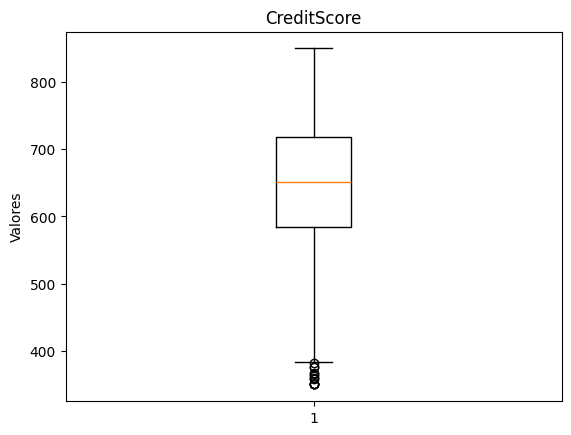

In [4]:
import matplotlib.pyplot as plt

#Criar gráfico de boxplot
plt.boxplot(df['CreditScore'])
plt.title('CreditScore')
plt.ylabel('Valores')
plt.show()

In [5]:
print(df['CreditScore'].min())
print(df['CreditScore'].max())

350
850
